In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
def select_uniques(in_table, dom_per=25, sec_per=5, dom_count=20, ret_table=False):
    selection = in_table[(in_table["% Dominant ORF"] >= dom_per) & (in_table["% 2nd Dominant ORF"] <= sec_per) & 
                        (in_table["Count Dominant ORF"] >= dom_count)]
    if ret_table:
        return selection
    return len(set(selection["Dominant ORF"]))

def select_uniques2(in_table, dom_per=25, sec_per=5, dom_count=20, ret_table=False):
    selection = in_table[(in_table[" % Domint ORF"] >= dom_per) & (in_table[" % 2nd Domint ORF"] <= sec_per) & 
                        (in_table["Domint ORF count"] >= dom_count)]
    if ret_table:
        return selection
    return len(set(selection["  Domint ORF"]))


# Number of unique ORFs based on different selection criteria

AD: With default values (>= 30% dominant ORF, <= 5% Second ORF, >= 20 reads for dominant ORF) we have: 2680 Unique ORFs. 
DB: With default values (>= 30% dominant ORF, <= 5% Second ORF, >= 20 reads for dominant ORF) we have: 3041 Unique ORFs. 


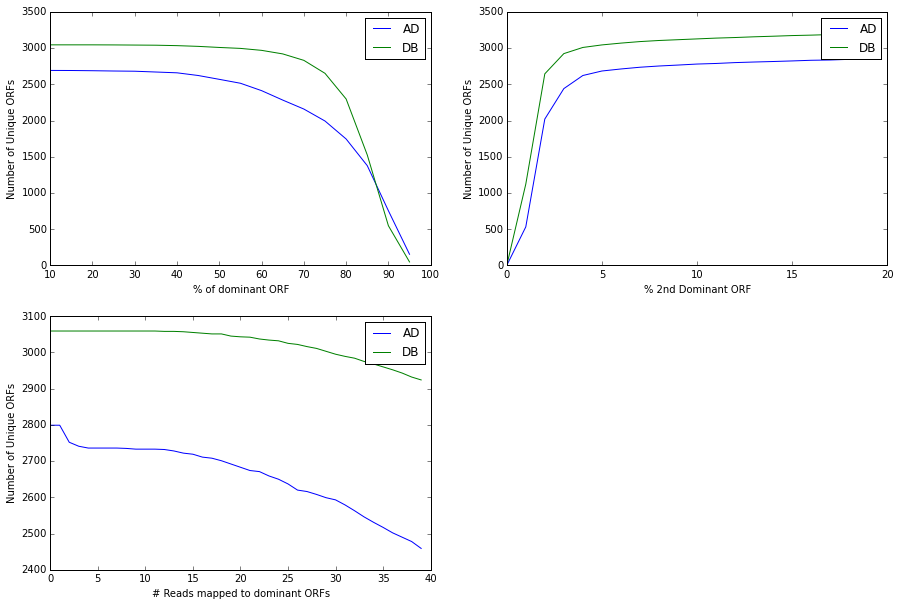

In [3]:
my_data_ad = pd.read_excel('./input/finalYeastOrfeomeADSummaryFile.xlsx', sep='\t')
my_data_db = pd.DataFrame.from_csv('./input/finalYeastOrfeomeDBSummaryFile.txt', sep='\t')

plt.subplot(2,2,1)
allx = range(10, 100, 5)
plt.xlabel('% of dominant ORF')
plt.ylabel('Number of Unique ORFs');
ally = [select_uniques(my_data_ad, dom_per=i) for i in allx]
ally2 = [select_uniques2(my_data_db, dom_per=i) for i in allx]
plt.plot(allx, ally, label='AD')
plt.plot(allx, ally2, label='DB')
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('% 2nd Dominant ORF')
plt.ylabel('Number of Unique ORFs');
allx = range(0, 20, 1)
ally = [select_uniques(my_data_ad, sec_per=i) for i in allx]
ally2 = [select_uniques2(my_data_db, sec_per=i) for i in allx]
plt.plot(allx, ally, label='AD')
plt.plot(allx, ally2, label='DB')
plt.legend()

plt.subplot(2,2,3)
plt.xlabel('# Reads mapped to dominant ORFs');
plt.ylabel('Number of Unique ORFs')
allx = range(0, 40, 1)
ally = [select_uniques(my_data_ad, dom_count=i) for i in allx]
ally2 = [select_uniques2(my_data_db, dom_count=i) for i in allx]
plt.plot(allx, ally, label='AD');
plt.plot(allx, ally2, label='DB')
plt.legend()

print('AD: With default values (>= 30% dominant ORF, <= 5% Second ORF, >= 20 reads for dominant ORF) '
      'we have: {} Unique ORFs. '.format(select_uniques(my_data_ad, dom_per=30)))
print('DB: With default values (>= 30% dominant ORF, <= 5% Second ORF, >= 20 reads for dominant ORF) '
      'we have: {} Unique ORFs. '.format(select_uniques2(my_data_db, dom_per=30)))

# Number of ORFs based on Plate

## DB plates

In [4]:
filtered_table = select_uniques2(my_data_db, ret_table=True)
filtered_table['Plate'] = filtered_table.index
# filtered_table['Plate'].value_counts()

C:\Python34\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


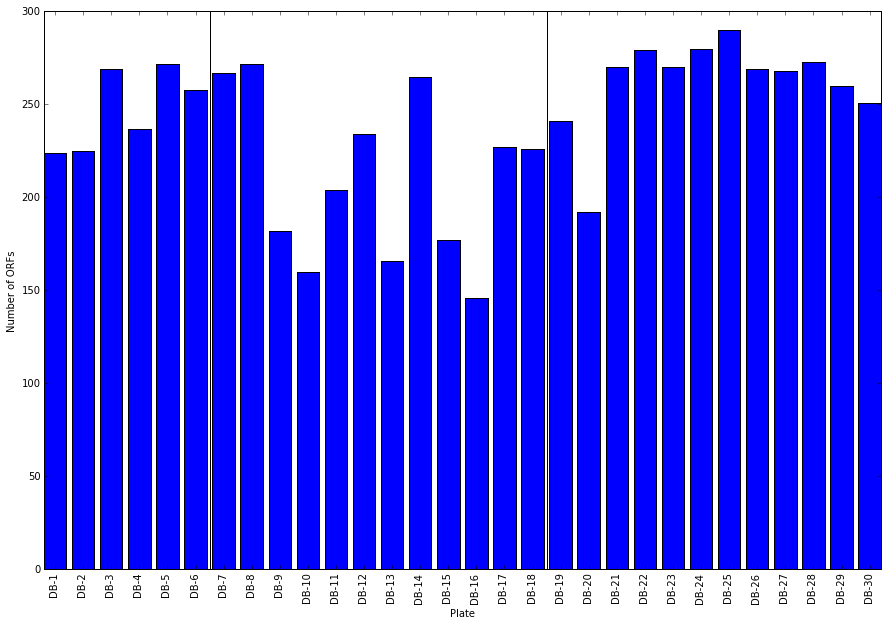

In [5]:
plot_vals = dict(filtered_table['Plate'].value_counts())
# plot_vals = sorted([[a,b] for (a,b) in plot_vals.items()])
porder = ['DB-{}'.format(i) for i in range(1,31)]
# print(porder)

plt.bar(range(len(plot_vals)), [plot_vals[i] for i in porder] , align="center")
plt.xticks(range(len(plot_vals)), porder);
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

# batch lines
plt.plot([5.5, 5.5], [1,300], color='black')
plt.plot([17.5, 17.5], [1,300], color='black');
plt.ylabel('Number of ORFs');
plt.xlabel('Plate');

## AD plates

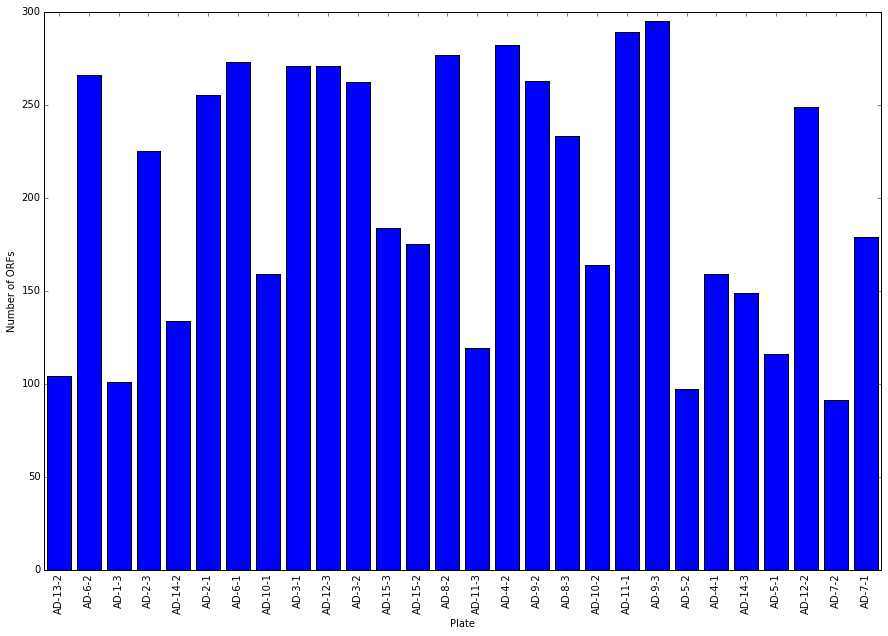

In [33]:
filtered_table = select_uniques(my_data_ad, ret_table=True)

plot_vals = dict(filtered_table['Plate'].value_counts());
plt.bar(range(len(plot_vals)), plot_vals.values() , align="center");
plt.xticks(range(len(plot_vals)), list(plot_vals.keys()));
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.ylabel('Number of ORFs');
plt.xlabel('Plate');
plt.xlim([-0.5, 27.5]);

# AD plates with no filters

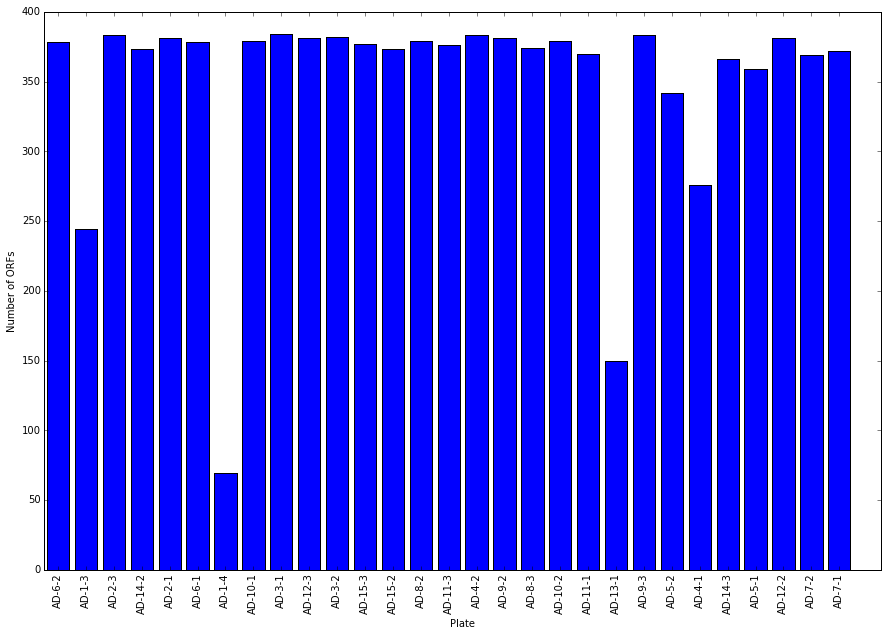

In [34]:
plot_vals = dict(my_data_ad['Plate'].value_counts());
plt.bar(range(len(plot_vals)), plot_vals.values() , align="center");
plt.xticks(range(len(plot_vals)), list(plot_vals.keys()));
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.ylabel('Number of ORFs');
plt.xlabel('Plate');
plt.xlim([0.5, 30.5]);

Plates dropped by filtering: <br/>
- Plate 1-4: It could have happened that the colonies were not stamped to kiloSeq wells. <br/>
- Plate 13-1: ???